In [2]:
#Importando bibliotecas

import pandas as pd 
import seaborn as sns #pacote de gráficos
import matplotlib.pyplot as plt #pacote de gráficos
from matplotlib.pyplot import figure #função específica dentro do plt

In [7]:
turbina = pd.read_csv('T1.csv') #lendo o arquivo
turbina.columns = ['Data/hora', 'Potencia', 'Velocidade vento(m/s)', 'CurvaTeórica', 'Direção Vento' ] #mudando nome das colunas originais
del turbina ['Direção Vento'] #excluindo coluna Direção Vento
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format="%d %m %Y %H:%M") #mudando o formato da coluna Data/hora
display(turbina) #exibindo os resultados encontrados no arquivo 

,Data/hora,Potencia,Velocidade vento(m/s),CurvaTeórica
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<Axes: xlabel='Velocidade vento(m/s)', ylabel='Potencia'>

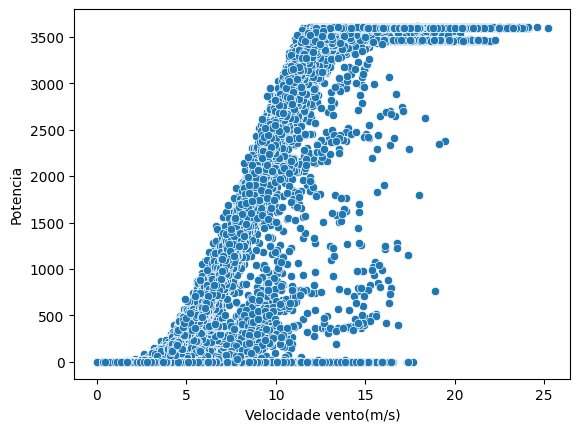

In [10]:
#criando um gráfico com os dados obtidos da velocidade do vento por potencia

sns.scatterplot(data=turbina, x='Velocidade vento(m/s)', y='Potencia') #definindo quais colunas estão nos eixos x e y

<Axes: xlabel='Velocidade vento(m/s)', ylabel='CurvaTeórica'>

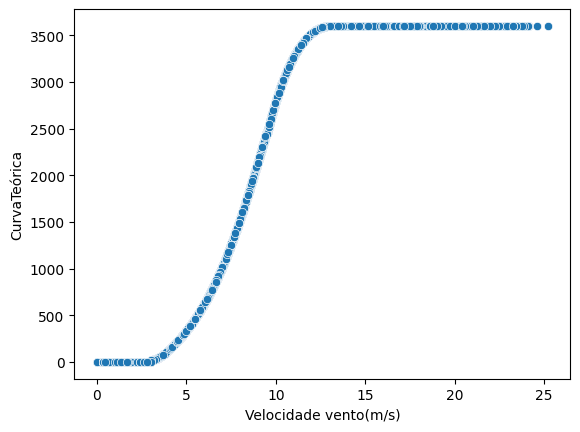

In [16]:
#criando um gráfico com os dados obtidos da velocidade do vento por curva teórica

sns.scatterplot(data=turbina, x='Velocidade vento(m/s)', y='CurvaTeórica') #definindo quais colunas estão nos eixos x e y


In [24]:
#determinando os "limites aceitáveis", serão 5% a mais e 5% a menos de parâmetro, o que estiver no meio disso está 'ok'

pot_real = turbina['Potencia'].tolist() #criando uma lista com a coluna potencia
pot_teorica = turbina['CurvaTeórica'].tolist() #criando uma lista com a coluna curvateorica
pot_max = [] #criando uma lista para a potencia maxima
pot_min = [] #criando uma lista para a potencia minima
dentro_limite = [] #criando uma lista para a regra de se estar dentro do limite


for potencia in pot_teorica: #percorrendo as listas
    pot_max.append(potencia*1.05) #adicionando os valores na lista pot_max e multiplicando por 5%
    pot_min.append(potencia*0.95) #adicionando os valores na lista pot_min e multiplicando por -5%

for p, potencia in enumerate(pot_real): #criando uma regra onde p referencia cada indície, exemplo,quando for 0 = p, quando for 1 = p1 e assim em diante
    if potencia >=pot_min[p] and potencia <=pot_max[p]:
        dentro_limite.append('Dentro') #regra para caso a potencia esteja dentro do limite
    elif potencia == 0:
        dentro_limite.append('Zero') #regra para caso a potencia seja zero
    else:
        dentro_limite.append('Fora') #regra para caso a potencia esteja fora do limite

print(dentro_limite.count('Dentro')/len(dentro_limite)) #determinando a porcentagem que está dentro do limite 

0.37286760340391845


In [25]:
turbina['DentroLimite'] = dentro_limite #criando a nova coluna DentroLimite que está puxando o resultado acima
display(turbina)

,Data/hora,Potencia,Velocidade vento(m/s),CurvaTeórica,DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<Axes: xlabel='Velocidade vento(m/s)', ylabel='Potencia'>

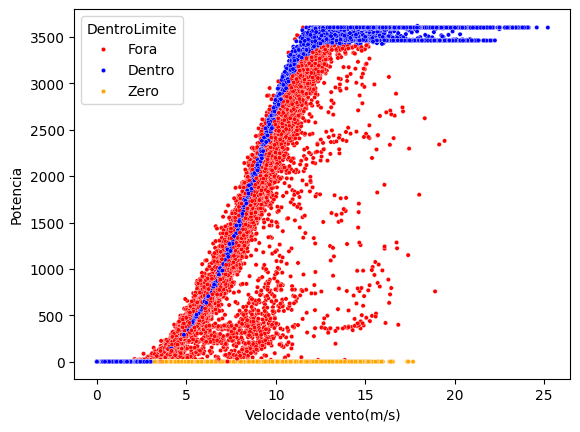

In [31]:
#criando novamente o gráfico:

#criando um gráfico com os dados obtidos da velocidade do vento por potencia
cores = {'Dentro': 'blue', 'Fora':'red', 'Zero':'orange'} #criando um dicionário para as cores
sns.scatterplot(data=turbina, x='Velocidade vento(m/s)', y='Potencia', hue= 'DentroLimite', s=10, palette=cores) #definindo quais colunas estão nos eixos x e y mas adicionando no gráfico os registros do parâmetro 'DentroLimite'